Question 12:
Consider the one-dimensional, time-independent Schroedinger equation describing a particle with wave function $\psi(x)$ and energy $E$: $$-\frac{1}{2\,m_{e}}\,\frac{d^{2}\psi(x)}{dx^{2}} + V(x)\,\psi(x) = E\,\psi(x).$$ Values for the constant $m_{e}$ and others required for the calculation in natural(!) units are given in the code cell below. Natural units set $c=\hbar{}=1$ which means all masses and energies are in units of electron Volts \[eV\]. Length units change to \[1/eV\] and a conversion factor between \[m\] and \[1/eV\] is given.

### Tasks: 

**(a)** Consider a square potential well with $V(x)=0$ in between two infinitely high walls separated by a distance $L$ equal to the Bohr radius, i.e. for all x in the interval $[0,L]$. Write a function `solve(energy, func)` which takes the parameter energy and a python function `func`. This function should solve the Schroedinger ODE for the case described above and return only the final value of $\psi(L)$ at the boundary $L$. 

Write a function `eqn(x, y, energy)` containing the two first-order differential equations equivalent to the Schroedinger equation. Use this function as input for the `solve(energy, func)` function. This detailed naming scheme is required for the first tests of your code.

Write a script using the function `solve(energy, func)` to calculate the ground state energy of an electron in this potential well in units of eV. For the initial condition, see technical hint below. For the number of values to solve for $\psi(x)$ the value 1000 is recommended.

The result of your calculation should be a number between 134 eV and 135 eV. One of the tests will assess your `solve(energy, func)` function for a distorted potential well.

---

**(b)** Consider the harmonic potential $$V(x)=V_{0}\,x^{2}/a^{2},$$ where $V_{0}$ and $a=10^{-11}$ m are constants (remember to convert \[m\] to \[1/eV\]). Limit the infinite range of the variable $x$ to the interval $[-10a, 10a]$ with $V_{0}=50$ eV. The harmonic oscillator is known to have equidistant energy eigenvalues. Check that this is true, to the precision of your calculation, by calculating the ground state and the first 2 excited states. (Hint: the ground state has energy in the range 100 to 200 eV. You must program a different, say `solve2(energy)`, function name to part (a) for this exercise or the test for part (a) will fail.)

In order to test your result, write a function `result()` which must return the difference of calculated energy eigenvalues in eV as a single number. As stated above, the absolute difference between the ground and first state and the first and second state should be very close to equal. Either of those two numbers should be returned. Consider that this is merely a function to enable automated testing and hence should really only return the requested value. Calculations should take place earlier in your code so that `result()` can run without an input argument.

---

**(c)** Plot the normalized wavefunctions, for the ground state energy and the two excited state energies as obtained without normalization in part (b). Note that normalization of a wavefunction requires the calculation of the integral of the square of the wavefunction $\int|\psi(x)|^{2}dx$ and subsequent division of $\psi(x)$ by the square root of the integral. 

Provide a plot with appropriate axis labels, plot all three wavefunctions onto a single canvas using color-coded lines and use x-axis values in units of \[m\], i.e. the original interval $[-10a, 10a]$.

---

### Technical Hint:
 
This is not an initial value problem for the Schroedinger ODE but a boundary value problem! This requires additional effort, a different method to the previous ODE exercises and is hence an 'unseen' problem. 

Take a simple initial condition for both problems at $x_{0}=0$ or $x_{0}=-10a$, respectively: $\psi(x_{0})=0$ and $d\psi(x_{0})/dx=1$. Use that as a starting point to solve the ODE and vary the energy, $E$, until a solution converges. The task is to evaluate the variation of the energy variable until the second boundary condition (for instance at L for exercise (a)) is satisfied since the first boundary condition is already satisfied due to the choice of initial condition. 

This requires an initial guess for the energy interval in which the solution might be and a computational method for root finding. Search scipy for root finding methods and select one which does not require knowledge of the derivative. Root finding is appropriate here since the boundary condition to satisfy is $\psi(x)=0$ to a given precision.

### Technical Hint 2: 
Part (a) requires using `solve_ivp` in order to solve the boundary value problem in combination with a root finder function. The SciPy boundary value solver, `solve_bvp`, can be used for parts (b) and (c), if you wish. The root finding, `solve_ivp` method will also work, however.

### Quantum physics background: 
For those lacking the first year quantum module, the boundary condition for both exercises is that $\psi(x)=0$ at each potential boundary. These are only fulfilled at specific, discrete energy values $E$, called energy eigenvalues, where the smallest of these is called the ground state energy.

In [7]:
""" 
We define the Schrödinger equation as a system of two first-order ODEs and then applying boundary conditions to solve for the unknowns, 
the wave function and its derivative, within the potential well.

First boundary condition:
    An initial guess or condition is set for the wave function and its derivative at a specific position within the potential well.
    For example, psi(0)=0 dpsi/dx(0)​=1 could be initial conditions at x=0 or a similar condition at another specified point.

Second boundary condition:
    The goal is to find the energy values for which the wave function satisfies the second boundary condition. 
    For instance, psi(L)=0 might be the condition at the edge of the potential well (L represents the boundary).

Bisect:
    A root-finding algorithm is utilized to iteratively search for the energy values that satisfy the second boundary condition. 
    The process involves narrowing down an energy range until the wave function at the boundary converges to zero or satisfies the condition within a given precision.

"""

''' required physical constants. Do not change.'''

from scipy.constants import c, m_e, eV, e
me_ev  = m_e*c**2/e          # mass m_e in [eV]

l_bohr = 5.2918e-11          # Bohr radius [m]
convert_length = 5067730.179 # convert [m] to [1/eV] in natural units
l_ev   = l_bohr * convert_length

# YOUR CODE HERE
# Q(a)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, simpson
from scipy.optimize import bisect
from scipy.constants import c, m_e, e

me_ev  = m_e * c**2 / e
l_bohr = 5.2918e-11
convert_length = 5067730.179
l_ev = l_bohr * convert_length


def eqn(x, y, energy):
    psi, phi = y
    dpsi_dx = phi
    dphi_dx = -2.0 * me_ev * energy * psi  
    return [dpsi_dx, dphi_dx]

def solve(energy, func):
 

    sol = solve_ivp(
        func,
        (0.0, l_ev),
        [0.0, 1.0],                      
        t_eval=np.linspace(0.0, l_ev, 1000),
        args=(energy,)
    )
    return sol.y[0, -1]  

def shoot(E):
    return solve(E, eqn)

E0_well = bisect(shoot, 134.0, 135.0)

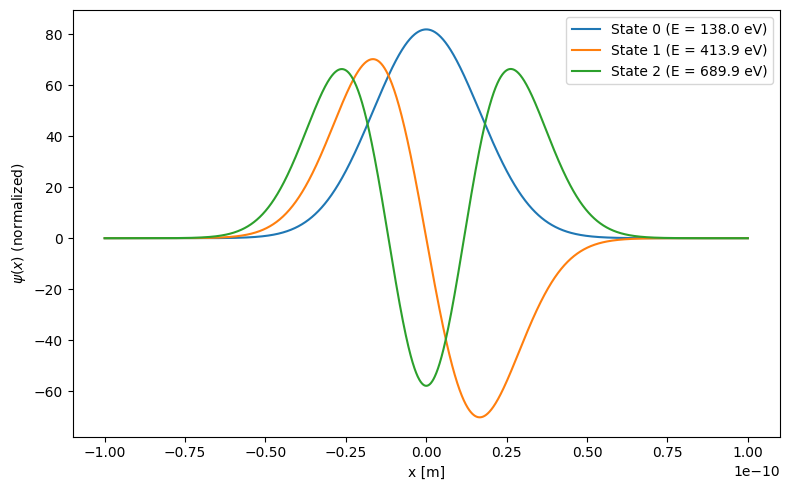

In [8]:
# solution to parts (b), (c)

# YOUR CODE HERE

# Q(b)
V0 = 50.0                        
a_m = 1e-11                       
a   = a_m * convert_length       

xmin, xmax = -10.0 * a, 10.0 * a
x_ev = np.linspace(xmin, xmax, 2000)

def eqn2(x, y, energy):
    psi, phi = y
    V = V0 * x**2 / a**2
    dpsi_dx = phi
    dphi_dx = 2.0 * me_ev * (V - energy) * psi
    return [dpsi_dx, dphi_dx]

def solve2(energy):
    sol = solve_ivp(
        eqn2,
        (xmin, xmax),
        [0.0, 1.0],          
        t_eval=[xmax],
        args=(energy,)
    )
    return sol.y[0, -1]      

E_scan = np.linspace(80.0, 800.0, 4000)
psi_end = np.array([solve2(E) for E in E_scan])

E_vals = []
for i in range(len(E_scan) - 1):
    if psi_end[i] * psi_end[i+1] < 0:
        root = bisect(solve2, E_scan[i], E_scan[i+1])
        if len(E_vals) == 0 or abs(root - E_vals[-1]) > 1e-3:
            E_vals.append(root)
        if len(E_vals) == 3:   
            break


def result():
    return abs(E_vals[1] - E_vals[0])


# Q(c)
def wavefunction(E):
    sol = solve_ivp(
        eqn2,
        (xmin, xmax),
        [0.0, 1.0],
        t_eval=x_ev,
        args=(E,)
    )
    psi = sol.y[0]
    norm = np.sqrt(simpson(psi**2, x_ev))
    return psi / norm

x_m = x_ev / convert_length

plt.figure(figsize=(8, 5))
for i, E in enumerate(E_vals):
    psi_norm = wavefunction(E)
    plt.plot(x_m, psi_norm, label=f"State {i} (E = {E:.1f} eV)")

plt.xlabel("x [m]")

plt.ylabel(r"$\psi(x)$ (normalized)")
plt.legend()
plt.tight_layout()
plt.show()